In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as ar
import sklearn

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read in data
aiteo_df = pd.read_excel('AITEO.xlsx')
newcross_df = pd.read_excel('NEWCROSS.xlsx')
eroton_df = pd.read_excel('EROTON.xlsx')
belemoil_df = pd.read_excel('BELEMOIL.xlsx')

In [3]:
aiteo_df.head()

,MONTH,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj),Oil Adj,Water Adj
0,2019-01-01,1.563275e+06,1.160851e+06,165896.232231,-49148.168453,176852.681534,126642.777875,1.259779e+06,1.044103e+06,1.295499e+06,1.044103e+06,-52004.141837,35719.338760
1,2019-02-01,1.635528e+06,1.184590e+06,273090.981793,-110089.443526,267881.353194,190168.086800,1.177478e+06,1.021589e+06,1.179348e+06,1.021589e+06,10527.417625,1869.332243
2,2019-03-01,1.167493e+06,7.990186e+05,175015.834728,11857.052942,211532.714013,41683.181942,9.142767e+05,6.121457e+05,9.142767e+05,6.121457e+05,0.000000,0.000000
3,2019-04-01,1.035103e+06,8.129160e+05,119368.707531,22132.450772,174845.195454,28181.726746,8.320770e+05,6.714150e+05,8.090800e+05,6.714150e+05,-20095.000000,-22997.000000
4,2019-05-01,1.190359e+06,8.607419e+05,171650.922775,20686.681752,236045.905789,35156.599833,9.191568e+05,6.684043e+05,8.519283e+05,6.684043e+05,36789.491616,-67228.420731


In [4]:
newcross_df.head()

,MONTH,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj),Oil Adj,Water Adj
0,2019-01-01,633013.533642,445887.775878,63842.430574,-19760.509432,71876.787581,49134.676485,512002.069575,401805.854737,533113.4244,401805.8547,18331.438736,21111.354821
1,2019-02-01,708296.247112,503567.573153,116306.826019,-47824.031983,116296.065212,80818.236353,511181.945546,435084.779116,510409.2356,435084.7791,2707.362684,-772.709989
2,2019-03-01,661872.841749,470088.129411,102967.399044,6975.882518,119881.927471,23842.886883,518148.027395,360144.847849,518148.0274,360144.8478,NaN,NaN
3,2019-04-01,539972.000000,404501.000000,59396.991331,11012.944798,91209.715743,14701.274913,434061.000000,334091.000000,424267.0000,334091.0000,-8585.000000,-9794.000000
4,2019-05-01,708716.867680,507674.619275,101241.513580,12201.221745,140540.290621,20916.252879,547260.324181,394231.883950,513915.6267,394231.8839,15438.833437,-33344.697512


In [5]:
eroton_df.head()

,MONTH,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj),Oil Adj,Water Adj
0,2019-01-01,1.094740e+06,642816.153345,55955.270325,-17319.275553,129107.427841,45957.425689,9.196748e+05,604180.158572,9.259135e+05,604180.1586,-135.552152,6238.687048
1,2019-02-01,1.325510e+06,809052.948147,106158.544906,-43651.175263,231260.411938,77739.250874,1.016510e+06,746545.578504,1.015818e+06,746545.5785,3394.700452,-692.281537
2,2019-03-01,1.117165e+06,724925.788401,91111.586544,-948.713585,207180.441638,14519.032079,8.954656e+05,634762.915443,8.954656e+05,634762.9154,NaN,NaN
3,2019-04-01,1.001090e+06,553669.000000,82953.466739,4126.147045,172126.322653,9826.178777,8.191380e+05,466590.000000,8.551440e+05,466590.0000,32629.000000,36006.000000
4,2019-05-01,1.190149e+06,688299.385238,139501.636466,5581.917502,240370.071233,13784.061527,9.359950e+05,543215.831269,9.789316e+05,543215.8313,7861.307514,42936.683363


In [6]:
belemoil_df.head()

,MONTH,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj),Oil Adj,Water Adj
0,2019-01-01,217213.618838,493.562902,70.668579,-21.873339,26007.124241,5949.169069,185257.325528,444.767662,185331.0192,444.767662,26205.262074,73.693662
1,2019-02-01,240723.347054,532.208096,122.921804,-50.544035,43388.641023,6618.967779,190715.738252,459.830327,190714.7001,459.830327,367.314042,-1.038118
2,2019-03-01,197079.760626,746.032324,163.409802,11.070762,36020.164748,5374.934277,155684.661601,571.551761,155684.6616,571.551761,NaN,NaN
3,2019-04-01,156383.000000,219.000000,32.174116,5.965483,26415.542163,4257.684000,125710.000000,181.000000,125700.0000,181.000000,-535.000000,-10.000000
4,2019-05-01,197525.416357,539.277473,107.543820,12.960750,39261.721369,5379.548604,152884.146384,418.772903,152839.8566,418.772903,14.775547,-44.289818


In [7]:
#Change month column to datetime and index
aiteo_df['MONTH'] = pd.to_datetime(aiteo_df['MONTH'], infer_datetime_format=True)
aiteo_df.set_index('MONTH', inplace = True)
aiteo_df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='MONTH', freq=None)

In [8]:
newcross_df['MONTH'] = pd.to_datetime(newcross_df['MONTH'], infer_datetime_format=True)
newcross_df.set_index('MONTH', inplace = True)
newcross_df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='MONTH', freq=None)

In [9]:
eroton_df['MONTH'] = pd.to_datetime(eroton_df['MONTH'], infer_datetime_format=True)
eroton_df.set_index('MONTH', inplace = True)
eroton_df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='MONTH', freq=None)

In [10]:
belemoil_df['MONTH'] = pd.to_datetime(belemoil_df['MONTH'], infer_datetime_format=True)
belemoil_df.set_index('MONTH', inplace = True)
belemoil_df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='MONTH', freq=None)

In [11]:
aiteo_df.dropna(axis = 1, inplace = True)
newcross_df.dropna(axis = 1, inplace = True)
eroton_df.dropna(axis = 1, inplace = True)
belemoil_df.dropna(axis = 1, inplace = True)

In [12]:
aiteo_df.isna().sum()

Rec Net Oil            0
Rec Water              0
Water theft loss       0
Water metering         0
Oil theft loss         0
Oil metering loss      0
Net oil alloc          0
Water alloc            0
Net Oil (After Adj)    0
Water (After Adj)      0
dtype: int64

# AITEO ANALYSIS

In [13]:
aiteo_df.describe()

,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj)
count,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,1.376447e+06,1.123721e+06,32618.306542,107501.331919,168874.029321,219970.462578,9.219598e+05,1.069261e+06,9.175734e+05,1.069261e+06
std,4.384020e+05,4.456741e+05,263026.017114,262788.225664,124064.167807,241015.542076,3.006607e+05,5.129717e+05,3.060098e+05,5.129717e+05
min,4.805928e+05,4.204247e+05,-371101.868368,-390425.041464,-186191.801161,-207667.240199,2.305417e+05,4.299236e+05,2.305417e+05,4.299236e+05
25%,1.134395e+06,8.094416e+05,-212256.934754,-43040.394088,168526.896591,40051.536415,8.937268e+05,6.543397e+05,8.412163e+05,6.543397e+05
50%,1.501963e+06,1.172721e+06,142632.469881,21409.566262,205400.732536,183010.066023,9.962527e+05,1.032846e+06,9.962527e+05,1.032846e+06
75%,1.685801e+06,1.336369e+06,199534.621494,329144.109200,240665.679342,445845.823061,1.100224e+06,1.468974e+06,1.100224e+06,1.468974e+06
max,1.865941e+06,1.840021e+06,424890.026767,520592.684000,267881.353194,595059.789309,1.259779e+06,1.928830e+06,1.295499e+06,1.928830e+06


In [14]:
aiteo_df.head()

,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj)
MONTH,,,,,,,,,,
2019-01-01,1.563275e+06,1.160851e+06,165896.232231,-49148.168453,176852.681534,126642.777875,1.259779e+06,1.044103e+06,1.295499e+06,1.044103e+06
2019-02-01,1.635528e+06,1.184590e+06,273090.981793,-110089.443526,267881.353194,190168.086800,1.177478e+06,1.021589e+06,1.179348e+06,1.021589e+06
2019-03-01,1.167493e+06,7.990186e+05,175015.834728,11857.052942,211532.714013,41683.181942,9.142767e+05,6.121457e+05,9.142767e+05,6.121457e+05
2019-04-01,1.035103e+06,8.129160e+05,119368.707531,22132.450772,174845.195454,28181.726746,8.320770e+05,6.714150e+05,8.090800e+05,6.714150e+05
2019-05-01,1.190359e+06,8.607419e+05,171650.922775,20686.681752,236045.905789,35156.599833,9.191568e+05,6.684043e+05,8.519283e+05,6.684043e+05


In [15]:
#Create a new feature for the proportion of oil at injection to total crude (oil + water) at injection
aiteo_df['Rec Oil Perc']= (aiteo_df['Rec Net Oil']/ (aiteo_df['Rec Net Oil']+aiteo_df['Rec Water']))*100

In [16]:
#Create a new feature for the proportion of oil at terminal to total crude (oil + water) at terminal
aiteo_df['Net Oil Alloc Perc']= (aiteo_df['Net Oil (After Adj)']/ (aiteo_df['Net Oil (After Adj)']+aiteo_df['Water (After Adj)']))*100

In [17]:
#Create a new feature for the difference in oil proportions between injection and terminal
aiteo_df['Net Oil Diff Perc']= aiteo_df['Rec Oil Perc'] - aiteo_df['Net Oil Alloc Perc']

In [18]:
aiteo_df

,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj),Rec Oil Perc,Net Oil Alloc Perc,Net Oil Diff Perc
MONTH,,,,,,,,,,,,,
2019-01-01,1.563275e+06,1.160851e+06,165896.232231,-49148.168453,176852.681534,126642.777875,1.259779e+06,1.044103e+06,1.295499e+06,1.044103e+06,57.386300,55.372615,2.013685
2019-02-01,1.635528e+06,1.184590e+06,273090.981793,-110089.443526,267881.353194,190168.086800,1.177478e+06,1.021589e+06,1.179348e+06,1.021589e+06,57.995015,53.583910,4.411105
2019-03-01,1.167493e+06,7.990186e+05,175015.834728,11857.052942,211532.714013,41683.181942,9.142767e+05,6.121457e+05,9.142767e+05,6.121457e+05,59.368725,59.896705,-0.527980
2019-04-01,1.035103e+06,8.129160e+05,119368.707531,22132.450772,174845.195454,28181.726746,8.320770e+05,6.714150e+05,8.090800e+05,6.714150e+05,56.011491,54.649290,1.362202
2019-05-01,1.190359e+06,8.607419e+05,171650.922775,20686.681752,236045.905789,35156.599833,9.191568e+05,6.684043e+05,8.519283e+05,6.684043e+05,58.035131,56.035653,1.999478
2019-06-01,1.846402e+06,1.502387e+06,290300.856544,-41004.469300,205740.434590,508769.671138,1.131892e+06,1.597106e+06,1.131892e+06,1.597106e+06,55.136407,41.476473,13.659933
2019-07-01,1.836618e+06,1.840021e+06,424890.026767,-390425.041464,256424.754422,490525.222243,1.089668e+06,1.805556e+06,1.089668e+06,1.805556e+06,49.953728,37.636752,12.316976
2019-08-01,1.865941e+06,1.804812e+06,-371101.868368,308212.945600,205061.030481,595059.789309,1.065820e+06,1.928830e+06,1.065820e+06,1.928830e+06,50.832650,35.590808,15.241843
2019-09-01,4.805928e+05,4.204247e+05,-138369.516481,189038.690700,74199.083532,175852.045247,2.305417e+05,4.299236e+05,2.305417e+05,4.299236e+05,53.338894,34.905947,18.432947


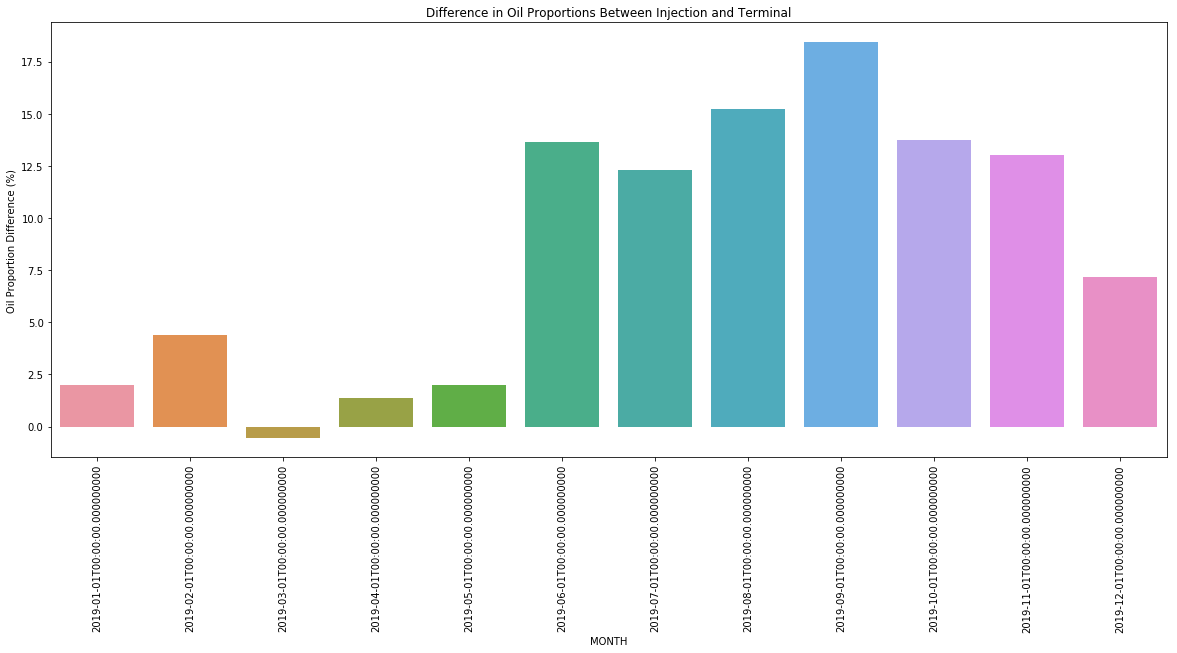

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x=aiteo_df.index, y=aiteo_df['Net Oil Diff Perc'])
plt.xticks(rotation=90)
plt.title("Difference in Oil Proportions Between Injection and Terminal")
plt.ylabel("Oil Proportion Difference (%)")
plt.show()

In [23]:
#create a new feature for oil theft loss proportions with respect to the reconciled oil volumes
aiteo_df['Oil theft proportions'] = aiteo_df['Oil theft loss']/ aiteo_df['Rec Net Oil']*100

In [24]:
#create a new feature for oil metering loss porportion with respect to the reconciled oil volume
aiteo_df['Oil metering proportions'] = aiteo_df['Oil metering loss']/ aiteo_df['Rec Net Oil']*100

In [25]:
#Create a new feature for allocated oil porportions with respect to reconciled oil volume
aiteo_df['Alloc/Rec Oil proportions'] = aiteo_df['Net oil alloc']/ aiteo_df['Rec Net Oil']*100

In [30]:
#Create a new feature for total oil loss proportions with respect to reconciled oil volumes
aiteo_df['Total Oil loss proportions'] = aiteo_df['Oil theft proportions'] + aiteo_df['Oil metering proportions']

In [31]:
aiteo_df

,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj),Rec Oil Perc,Net Oil Alloc Perc,Net Oil Diff Perc,Oil theft proportions,Oil metering proportions,Alloc/Rec Oil proportions,Total Oil loss proportions
MONTH,,,,,,,,,,,,,,,,,
2019-01-01,1.563275e+06,1.160851e+06,165896.232231,-49148.168453,176852.681534,126642.777875,1.259779e+06,1.044103e+06,1.295499e+06,1.044103e+06,57.386300,55.372615,2.013685,11.312957,8.101117,80.585881,19.414074
2019-02-01,1.635528e+06,1.184590e+06,273090.981793,-110089.443526,267881.353194,190168.086800,1.177478e+06,1.021589e+06,1.179348e+06,1.021589e+06,57.995015,53.583910,4.411105,16.378892,11.627322,71.993786,28.006214
2019-03-01,1.167493e+06,7.990186e+05,175015.834728,11857.052942,211532.714013,41683.181942,9.142767e+05,6.121457e+05,9.142767e+05,6.121457e+05,59.368725,59.896705,-0.527980,18.118548,3.570316,78.311136,21.688864
2019-04-01,1.035103e+06,8.129160e+05,119368.707531,22132.450772,174845.195454,28181.726746,8.320770e+05,6.714150e+05,8.090800e+05,6.714150e+05,56.011491,54.649290,1.362202,16.891575,2.722601,80.385913,19.614176
2019-05-01,1.190359e+06,8.607419e+05,171650.922775,20686.681752,236045.905789,35156.599833,9.191568e+05,6.684043e+05,8.519283e+05,6.684043e+05,58.035131,56.035653,1.999478,19.829804,2.953444,77.216752,22.783248
2019-06-01,1.846402e+06,1.502387e+06,290300.856544,-41004.469300,205740.434590,508769.671138,1.131892e+06,1.597106e+06,1.131892e+06,1.597106e+06,55.136407,41.476473,13.659933,11.142775,27.554650,61.302575,38.697425
2019-07-01,1.836618e+06,1.840021e+06,424890.026767,-390425.041464,256424.754422,490525.222243,1.089668e+06,1.805556e+06,1.089668e+06,1.805556e+06,49.953728,37.636752,12.316976,13.961788,26.708065,59.330148,40.669852
2019-08-01,1.865941e+06,1.804812e+06,-371101.868368,308212.945600,205061.030481,595059.789309,1.065820e+06,1.928830e+06,1.065820e+06,1.928830e+06,50.832650,35.590808,15.241843,10.989685,31.890601,57.119714,42.880286
2019-09-01,4.805928e+05,4.204247e+05,-138369.516481,189038.690700,74199.083532,175852.045247,2.305417e+05,4.299236e+05,2.305417e+05,4.299236e+05,53.338894,34.905947,18.432947,15.439075,36.590654,47.970271,52.029729


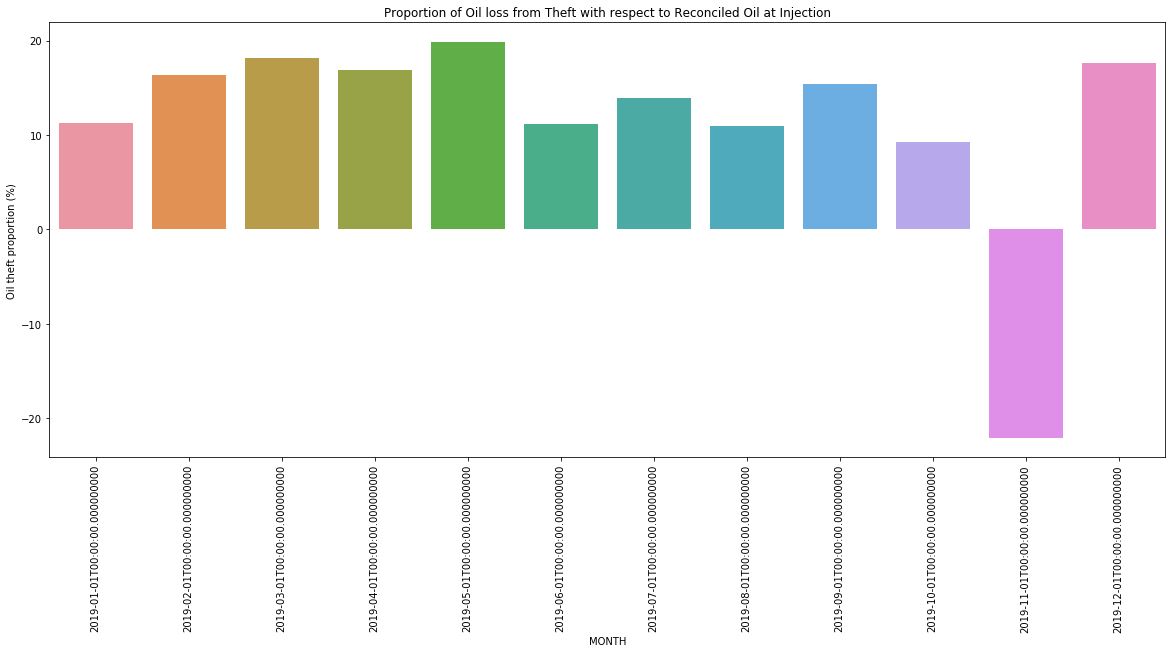

In [32]:
#Plot barchart of proportions of oil loss from theft
plt.figure(figsize=(20,8))
sns.barplot(x=aiteo_df.index, y=aiteo_df['Oil theft proportions'])
plt.xticks(rotation=90)
plt.title("Proportion of Oil loss from Theft with respect to Reconciled Oil at Injection")
plt.ylabel("Oil theft proportion (%)")
plt.show()

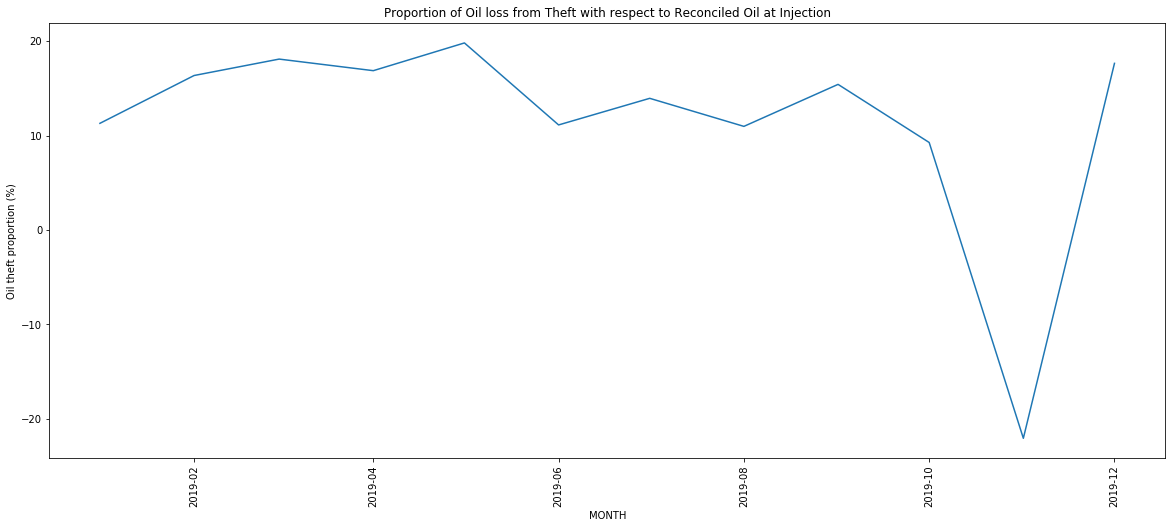

In [35]:
#Plot barchart of proportions of oil loss from theft
plt.figure(figsize=(20,8))
sns.lineplot(x=aiteo_df.index, y=aiteo_df['Oil theft proportions'])
plt.xticks(rotation=90)
plt.title("Proportion of Oil loss from Theft with respect to Reconciled Oil at Injection")
plt.ylabel("Oil theft proportion (%)")
plt.show()

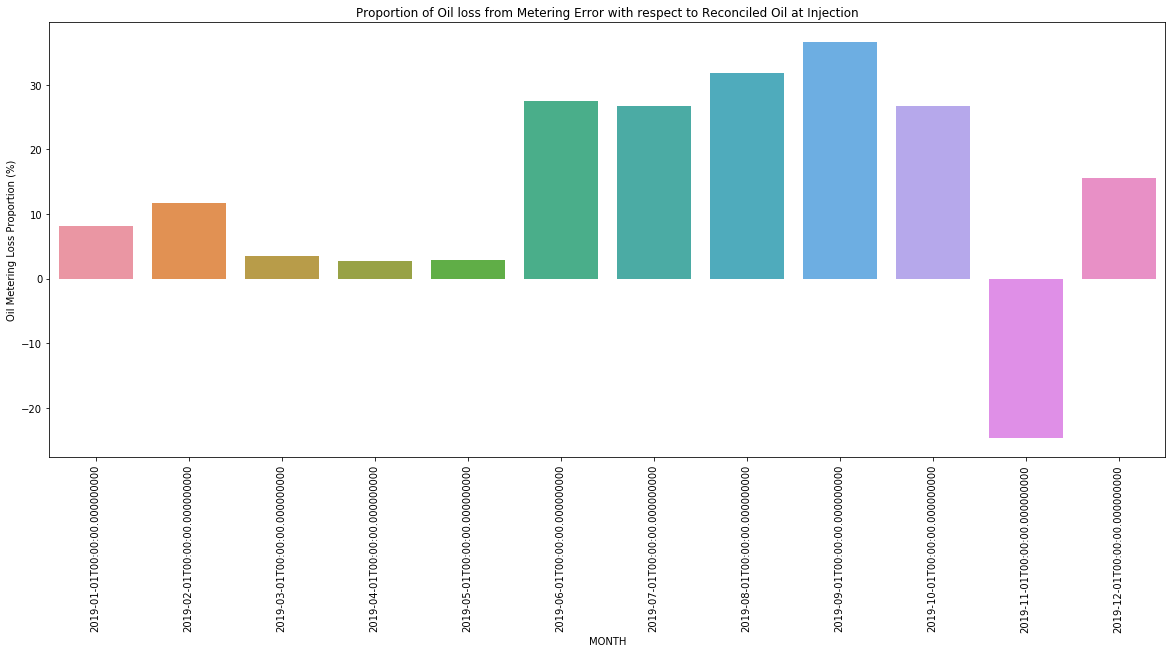

In [33]:
#Plot barchart of proportions of oil loss from theft
plt.figure(figsize=(20,8))
sns.barplot(x=aiteo_df.index, y=aiteo_df['Oil metering proportions'])
plt.xticks(rotation=90)
plt.title("Proportion of Oil loss from Metering Error with respect to Reconciled Oil at Injection")
plt.ylabel("Oil Metering Loss Proportion (%)")
plt.show()

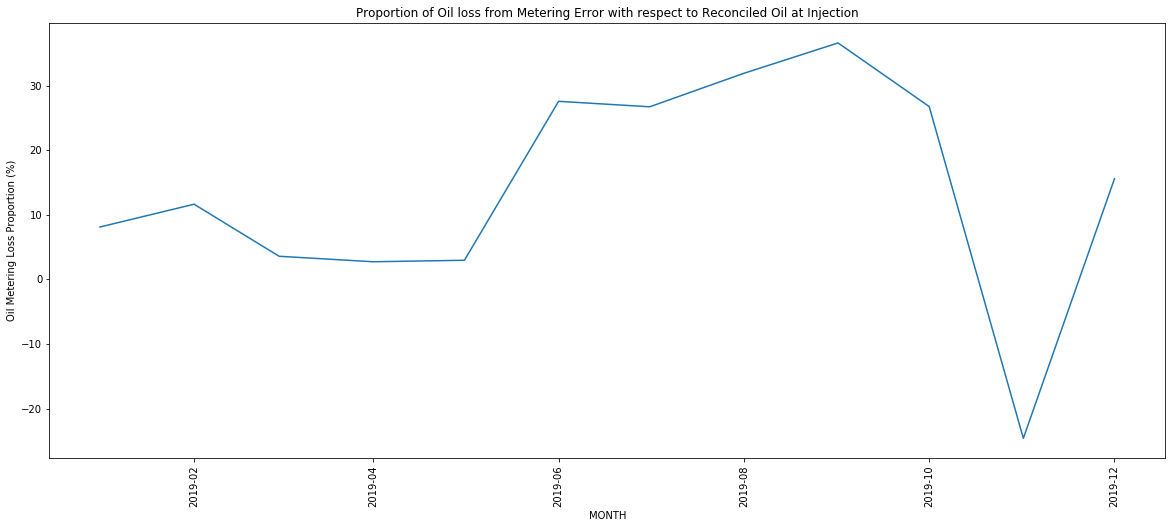

In [34]:
#Plot barchart of proportions of oil loss from theft
plt.figure(figsize=(20,8))
sns.lineplot(x=aiteo_df.index, y=aiteo_df['Oil metering proportions'])
plt.xticks(rotation=90)
plt.title("Proportion of Oil loss from Metering Error with respect to Reconciled Oil at Injection")
plt.ylabel("Oil Metering Loss Proportion (%)")
plt.show()

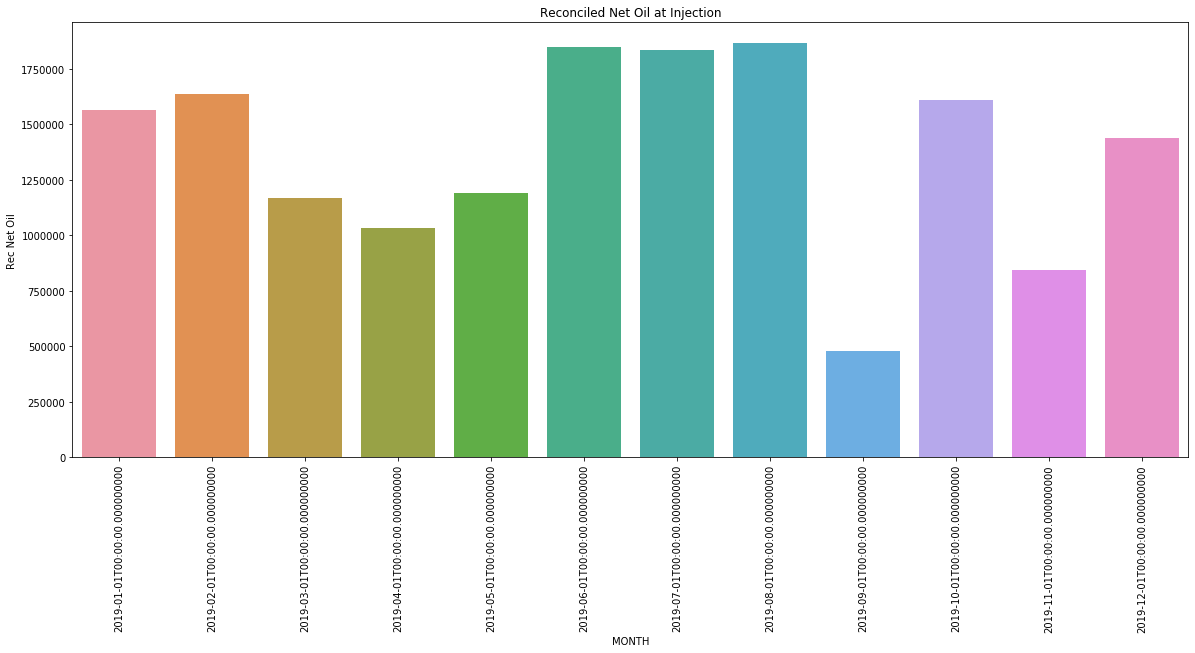

In [26]:
plt.figure(figsize = (20,8))
sns.barplot(x = aiteo_df.index, y = aiteo_df['Rec Net Oil'])
plt.xticks(rotation = 90)
plt.title('Reconciled Net Oil at Injection')
plt.ylabel('Rec Net Oil')
plt.show()

In [34]:
aiteo_df.corr()

,Rec Net Oil,Rec Water,Water theft loss,Water metering,Oil theft loss,Oil metering loss,Net oil alloc,Water alloc,Net Oil (After Adj),Water (After Adj)
Rec Net Oil,1.000000,0.945137,0.253319,-0.337223,0.591334,0.750884,0.901372,0.901001,0.904263,0.901001
Rec Water,0.945137,1.000000,0.157708,-0.320961,0.537062,0.848840,0.749669,0.977239,0.754074,0.977239
Water theft loss,0.253319,0.157708,1.000000,-0.931889,0.435391,0.012768,0.415572,0.043698,0.401382,0.043698
Water metering,-0.337223,-0.320961,-0.931889,1.000000,-0.581274,-0.216224,-0.452934,-0.208101,-0.442985,-0.208101
Oil theft loss,0.591334,0.537062,0.435391,-0.581274,1.000000,0.533159,0.703865,0.427294,0.681545,0.427294
Oil metering loss,0.750884,0.848840,0.012768,-0.216224,0.533159,1.000000,0.495867,0.907808,0.503773,0.907808
Net oil alloc,0.901372,0.749669,0.415572,-0.452934,0.703865,0.495867,1.000000,0.650052,0.997143,0.650052
Water alloc,0.901001,0.977239,0.043698,-0.208101,0.427294,0.907808,0.650052,1.000000,0.659023,1.000000
Net Oil (After Adj),0.904263,0.754074,0.401382,-0.442985,0.681545,0.503773,0.997143,0.659023,1.000000,0.659023
Water (After Adj),0.901001,0.977239,0.043698,-0.208101,0.427294,0.907808,0.650052,1.000000,0.659023,1.000000


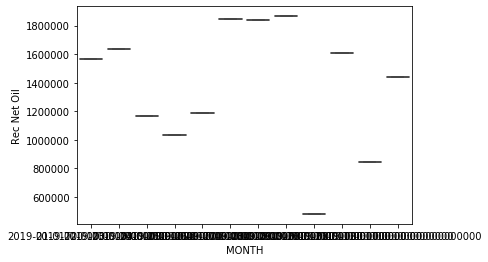

In [40]:
sns.boxplot(x = aiteo_df.index, y = aiteo_df['Rec Net Oil'])

In [36]:
aiteo_df["Rec Net Oil"].mean()

1376447.4964047198